# Mean-reversion Strategies with Bollinger Bands
__Mean Reversion__: Asset price returns to its mean value when overbought/oversold.

__Bollinger Bands__: SMA (eg. 30) + upper and lower bands of 2 std away from the middle line (SMA).
- upper and lower band distance can be tuned.

In [1]:
import pandas as pd

In [9]:
# get the data
df = pd.read_csv('intraday.csv', parse_dates=['time'], index_col='time')
df

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


<AxesSubplot:xlabel='time'>

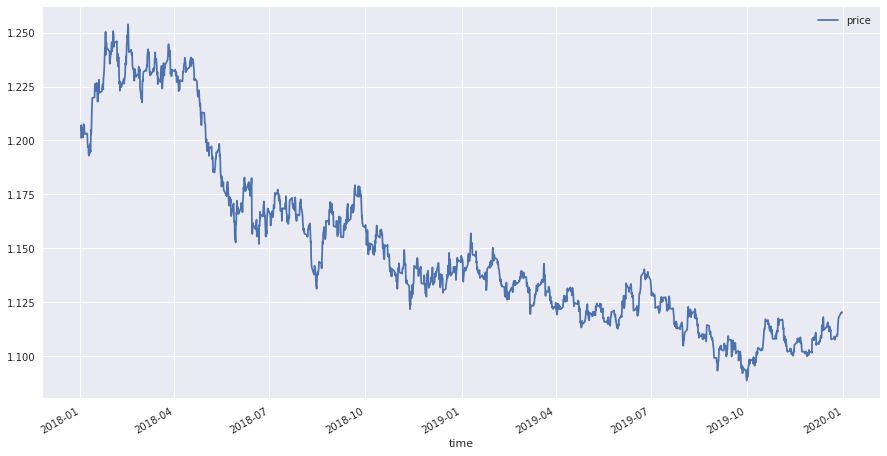

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df.plot(figsize=(15, 8))

In [10]:
# add return column
import numpy as np

df["returns"] = df.price.divide(df.price.shift(1)).apply(np.log)
df


,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [15]:
# Create constants for sma and std
SMA = 30
STD = 2

In [16]:
# Add the sma column
df["sma"] = df.price.rolling(SMA).mean()
df[28:33]

,price,returns,sma
time,,,
2018-01-10 22:00:00+00:00,1.195365,0.000523,NaN
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524


<AxesSubplot:xlabel='time'>

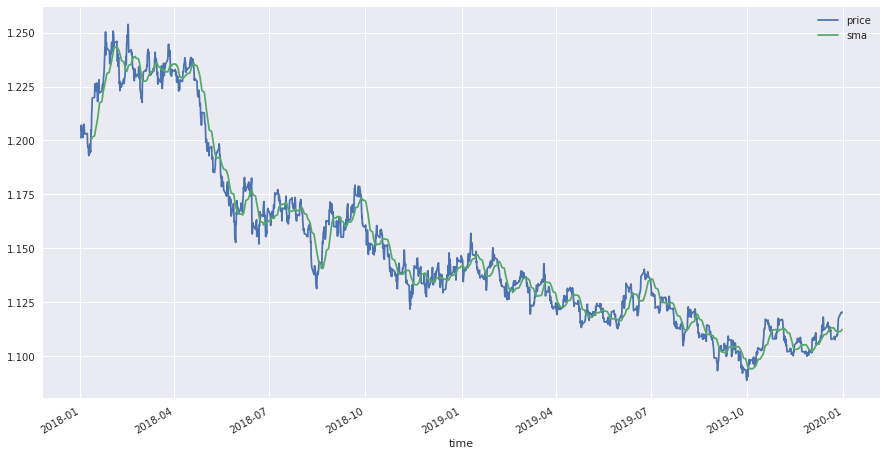

In [17]:
# Plot price and sma together
df[["price", "sma"]].plot(figsize=(15, 8))

In [22]:
# Add the lower and upper column
df["lower"] = df.sma - df.price.rolling(SMA).std().mul(STD)
df.tail()

,price,returns,sma,lower
time,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679


In [25]:
df["upper"] = df.sma + df.price.rolling(SMA).std().mul(STD)
df.tail()

,price,returns,sma,lower,upper
time,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.111996,1.103981,1.120011
2019-12-30 22:00:00+00:00,1.120355,0.000388,1.112256,1.103679,1.120832


<AxesSubplot:xlabel='time'>

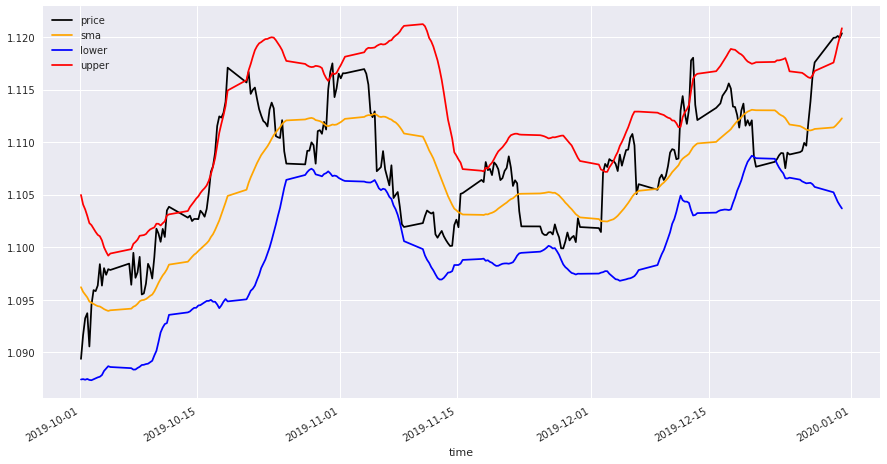

In [34]:
# See the bollinger band
df.drop(columns='returns').loc['2019-10': '2019-12'].plot(figsize=(15, 8), color=['black', 'orange', 'blue', 'red'])

In [39]:
# Add position
df.dropna(inplace=True)
df["position"] = np.where(df.price > df.upper, -1, np.nan)
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,NaN,0.004287
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,-1.0,0.011782
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,-1.0,0.013734
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,-1.0,0.018066
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,-1.0,0.017807
...,...,...,...,...,...,...,...
2019-12-26 22:00:00+00:00,1.111890,0.002012,1.111125,1.106091,1.116158,NaN,0.000765
2019-12-27 16:00:00+00:00,1.117580,0.001146,1.111247,1.105729,1.116764,-1.0,0.006333
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529


In [40]:
df.position = np.where(df.price < df.lower, 1, df.position)


In [41]:
# add "hold" position
df["distance"] = df.price - df.sma

In [42]:
price_crossed_ma = df.distance * df.distance.shift(1) < 0
df.position = np.where(price_crossed_ma, 0, df.position)
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,NaN,0.004287
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,-1.0,0.011782
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,-1.0,0.013734
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,-1.0,0.018066
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,-1.0,0.017807
...,...,...,...,...,...,...,...
2019-12-26 22:00:00+00:00,1.111890,0.002012,1.111125,1.106091,1.116158,0.0,0.000765
2019-12-27 16:00:00+00:00,1.117580,0.001146,1.111247,1.105729,1.116764,-1.0,0.006333
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529


In [43]:
# Forward fill the missing value
# eg. price is between lower bound and the MA
df.position = df.position.ffill()
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,NaN,0.004287
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,-1.0,0.011782
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,-1.0,0.013734
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,-1.0,0.018066
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,-1.0,0.017807
...,...,...,...,...,...,...,...
2019-12-26 22:00:00+00:00,1.111890,0.002012,1.111125,1.106091,1.116158,0.0,0.000765
2019-12-27 16:00:00+00:00,1.117580,0.001146,1.111247,1.105729,1.116764,-1.0,0.006333
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529


In [44]:
# forward fill the starting position
df.position = df.position.fillna(0)
df

,price,returns,sma,lower,upper,position,distance
time,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.0,0.004287
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,-1.0,0.011782
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,-1.0,0.013734
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,-1.0,0.018066
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,-1.0,0.017807
...,...,...,...,...,...,...,...
2019-12-26 22:00:00+00:00,1.111890,0.002012,1.111125,1.106091,1.116158,0.0,0.000765
2019-12-27 16:00:00+00:00,1.117580,0.001146,1.111247,1.105729,1.116764,-1.0,0.006333
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,-1.0,0.008529


In [48]:
# show the position distribution
df.position.value_counts().div(len(df)).round(2)

 0.0    0.42
 1.0    0.31
-1.0    0.27
Name: position, dtype: float64

<AxesSubplot:xlabel='time'>

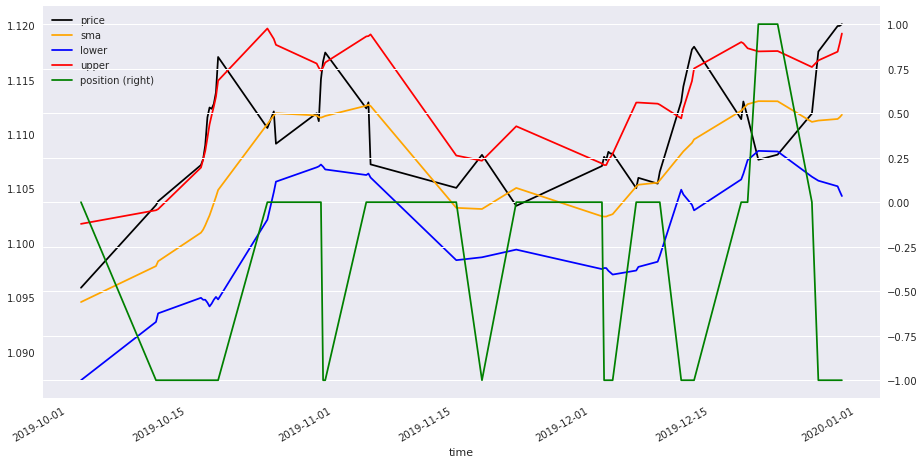

In [52]:
# Draw again with position in secondary_y
df.drop(columns=['returns', 'distance']).loc['2019-10': '2019-12'].plot(figsize=(15, 8), color=['black', 'orange', 'blue', 'red', 'green'], secondary_y="position")